#📊 Distribuição Normal - Gráficos Quantil-Quantil (Q-Q)

## 🎯 Objetivos

* Explicar para que servem os gráficos Q-Q.

* Descrever a forma de um gráfico Q-Q quando a suposição de distribuição é atendida.

* Ser capaz de criar um gráfico Q-Q normal.

## 🌟 Introdução

O gráfico quantil-quantil (Q-Q) é uma ferramenta gráfica exploratória usada para verificar a validade de uma suposição de distribuição para um conjunto de dados.

📝 Ideia Básica:

* A ideia principal é calcular o valor esperado teoricamente para cada ponto de dados com base na distribuição em questão.

* Se os dados realmente seguirem a distribuição assumida, os pontos no gráfico Q-Q cairão aproximadamente em uma linha reta. 📈

Antes de mergulharmos nos detalhes dos gráficos Q-Q, vamos descrever um método gráfico relacionado para avaliar suposições de distribuição:

* Histograma: Visualiza a distribuição de frequências.


## 🧠 Avaliando Suposições de Distribuição

O histograma é uma ferramenta gráfica muito útil para verificar se os dados seguem uma distribuição normal. No entanto, existem alguns cuidados que precisamos ter ao utilizá-lo, principalmente em relação ao número de bins.



Como Verificar a Normalidade com um Histograma?

* Forma de Sino (Bell Shape): A distribuição normal tem uma forma simétrica e em forma de sino. Os valores mais frequentes estão próximos da média, e a frequência diminui à medida que se afasta dela.

* Simetria: A curva deve ser aproximadamente simétrica em torno da média. A assimetria (skewness) deve ser próxima de zero.

* Caudas Suaves: As caudas da curva devem se afinar gradualmente. Caudas muito longas ou assimétricas podem indicar uma distribuição não normal.

* Picos e Vales: Um histograma com muitos picos e vales pode indicar que os dados não seguem uma distribuição normal ou que os bins estão mal ajustados.

Problema dos Bins no Histograma: O número de bins influencia fortemente a percepção visual da distribuição:

* Poucos Bins: Pode dar a impressão de que a distribuição é menos variável e esconder características importantes. A curva pode parecer muito rígida, mascarando possíveis assimetrias.

* Muitos Bins: A curva se torna fragmentada, com muitos picos e vales. Isso pode fazer parecer que há flutuações caóticas, mesmo em dados normais.

* Número Adequado de Bins: Deve haver um equilíbrio que permita visualizar a forma geral da distribuição sem excesso de ruído. Métodos como a regra de Sturges, raiz quadrada ou Freedman-Diaconis podem ajudar a escolher o número adequado.

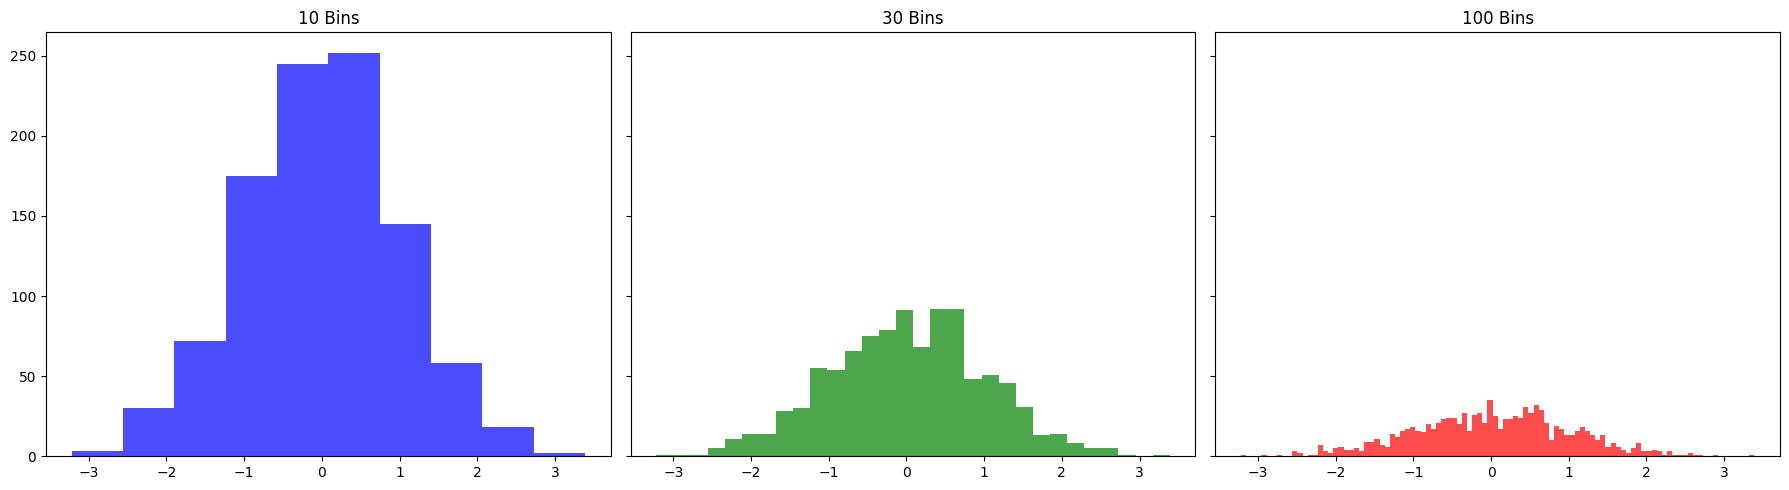

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Geração de dados normais
dados = np.random.normal(loc=0, scale=1, size=1000)

# Criação dos histogramas com diferentes números de bins
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Histograma com 10 bins (poucos bins)
axes[0].hist(dados, bins=10, color='blue', alpha=0.7)
axes[0].set_title("10 Bins")

# Histograma com 30 bins (médio)
axes[1].hist(dados, bins=30, color='green', alpha=0.7)
axes[1].set_title("30 Bins")

# Histograma com 100 bins (muitos bins)
axes[2].hist(dados, bins=100, color='red', alpha=0.7)
axes[2].set_title("100 Bins")

plt.tight_layout()
plt.show()


Você até pode adicionar a curva normal para verificar se as distribuições são normais

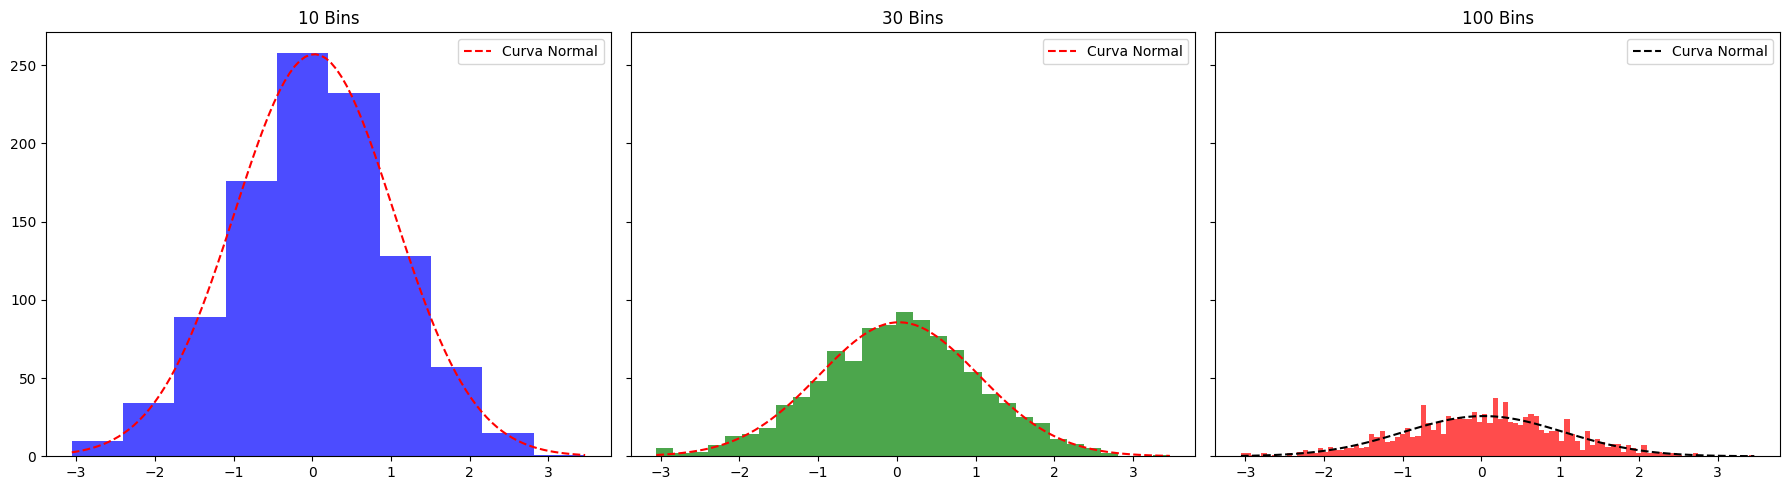

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Geração de dados normais
dados = np.random.normal(loc=0, scale=1, size=1000)

# Criação dos histogramas com diferentes números de bins
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Histograma com 10 bins (poucos bins)
counts, bins, _ = axes[0].hist(dados, bins=10, color='blue', alpha=0.7)
bin_width = bins[1] - bins[0]
x = np.linspace(min(dados), max(dados), 100)
pdf = norm.pdf(x, np.mean(dados), np.std(dados)) * len(dados) * bin_width
axes[0].plot(x, pdf, color='red', linestyle='--', label='Curva Normal')
axes[0].set_title("10 Bins")
axes[0].legend()

# Histograma com 30 bins (médio)
counts, bins, _ = axes[1].hist(dados, bins=30, color='green', alpha=0.7)
bin_width = bins[1] - bins[0]
pdf = norm.pdf(x, np.mean(dados), np.std(dados)) * len(dados) * bin_width
axes[1].plot(x, pdf, color='red', linestyle='--', label='Curva Normal')
axes[1].set_title("30 Bins")
axes[1].legend()

# Histograma com 100 bins (muitos bins)
counts, bins, _ = axes[2].hist(dados, bins=100, color='red', alpha=0.7)
bin_width = bins[1] - bins[0]
pdf = norm.pdf(x, np.mean(dados), np.std(dados)) * len(dados) * bin_width
axes[2].plot(x, pdf, color='black', linestyle='--', label='Curva Normal')
axes[2].set_title("100 Bins")
axes[2].legend()

plt.tight_layout()
plt.show()



Dessa forma, o gráfico representa a distribuição real dos dados, com a curva normal servindo apenas como um guia comparativo. Assim, conseguimos avaliar melhor se os dados seguem ou não uma distribuição normal.

Portanto, o histograma é uma ferramenta gráfica poderosa para visualizar a distribuição de dados e comparar com uma normal, mas ele tem uma característica importante e problemática: a sua forma depende fortemente do número de bins (intervalos) utilizados.

## 💡 Por Que Usar Gráficos Q-Q?

Como discutido anteriormente, o histograma é uma ferramenta poderosa para verificar a forma da distribuição, mas ele tem uma limitação significativa: depende fortemente do número de bins.

O gráfico Q-Q (Quantile-Quantile) não depende de dividir os dados em intervalos (bins). Em vez disso, ele compara diretamente os quantis da amostra com os quantis da distribuição teórica (normal, por exemplo).

🔍 Gráficos Q-Q são mais gerais do que essas alternativas e oferecem uma forma mais clara de verificar a aderência à distribuição esperada.

* Verificação Visual: Ajuda a identificar discrepâncias em relação à distribuição esperada.

* Detecção de Assimetria e Caudas: Identifica desvio da normalidade ou outras distribuições.

* Fácil Interpretação: Se os pontos formam uma linha reta, a distribuição está de acordo com o esperado.

## 💻 Como Criar um Gráfico Q-Q Normal


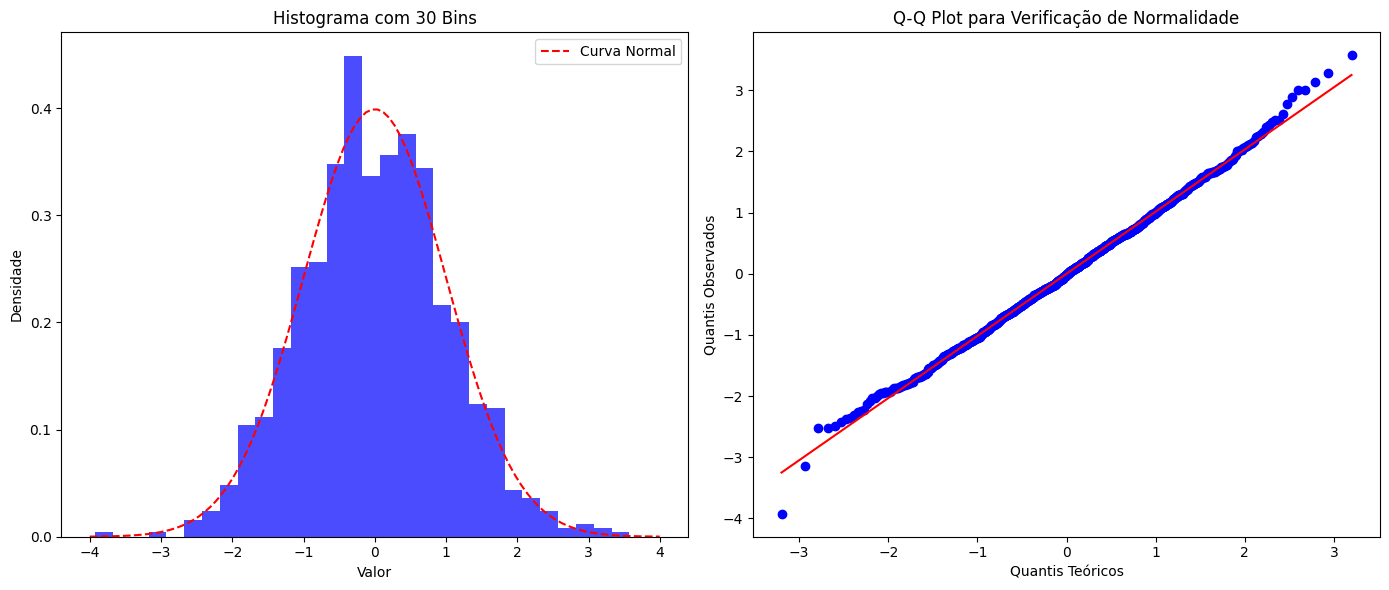

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

# Geração de dados normais
dados = np.random.normal(loc=0, scale=1, size=1000)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma com número adequado de bins
axes[0].hist(dados, bins=30, color='blue', alpha=0.7, density=True)
x = np.linspace(-4, 4, 100)
axes[0].plot(x, norm.pdf(x), color='red', linestyle='--', label='Curva Normal')
axes[0].set_title("Histograma com 30 Bins")
axes[0].set_xlabel("Valor")
axes[0].set_ylabel("Densidade")
axes[0].legend()

# Q-Q Plot
probplot(dados, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot para Verificação de Normalidade")
axes[1].set_xlabel("Quantis Teóricos")
axes[1].set_ylabel("Quantis Observados")

plt.tight_layout()
plt.show()


## 💻 Como comparar uma distribuição com a normal


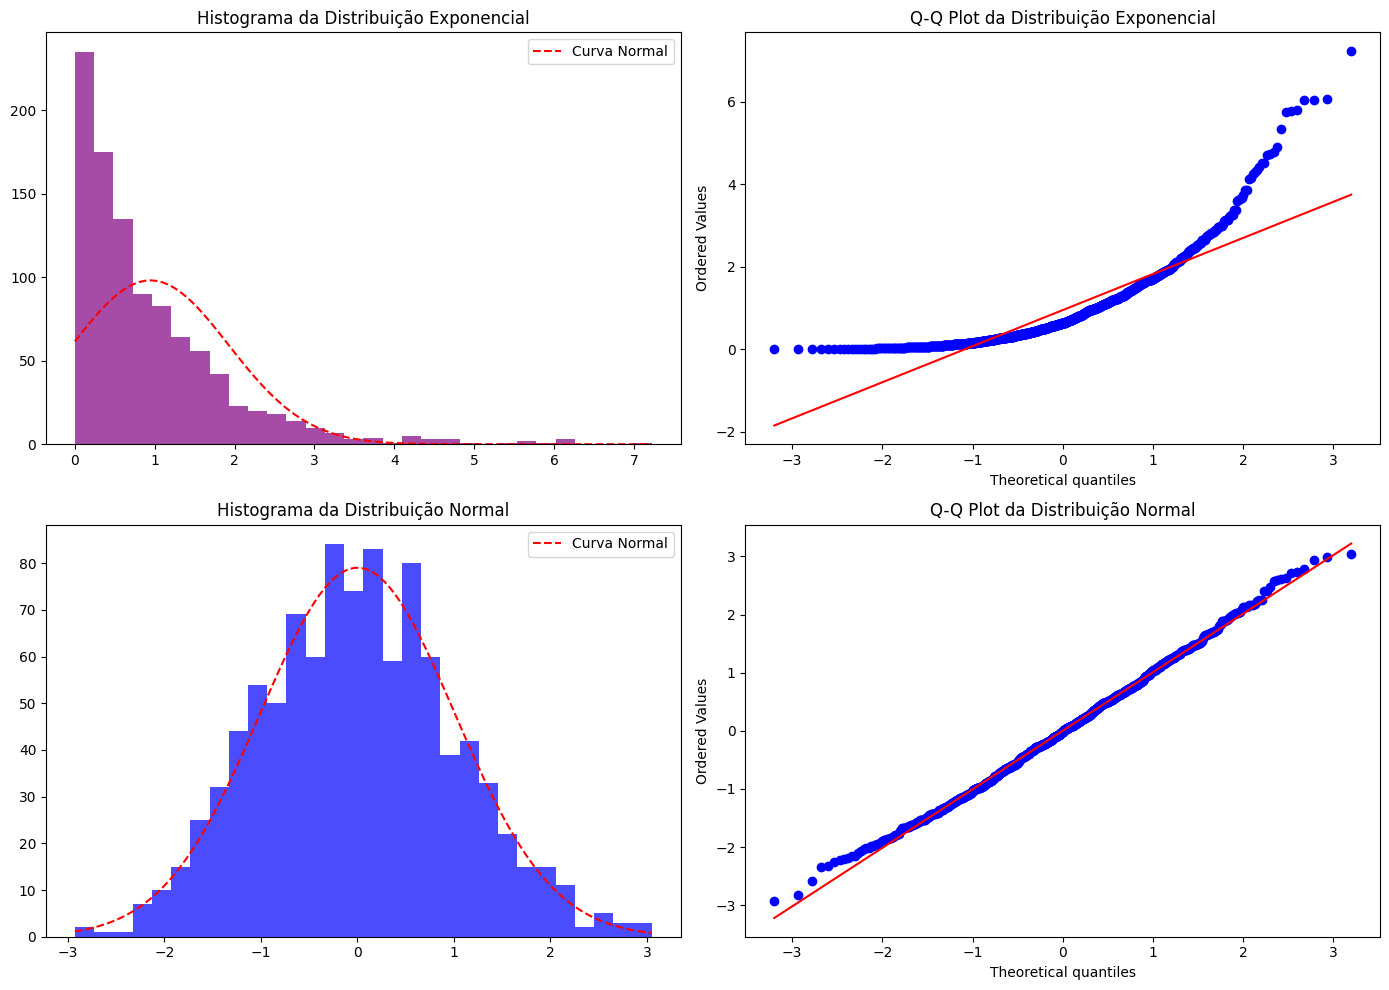

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, probplot

# Geração de dados exponenciais (não normal)
dados = np.random.exponential(scale=1, size=1000)

# Criação dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma com 30 bins e curva normal sobreposta
counts, bins, _ = axes[0, 0].hist(dados, bins=30, color='purple', alpha=0.7)
bin_width = bins[1] - bins[0]
x = np.linspace(min(dados), max(dados), 100)
pdf = norm.pdf(x, np.mean(dados), np.std(dados)) * len(dados) * bin_width
axes[0, 0].plot(x, pdf, color='red', linestyle='--', label='Curva Normal')
axes[0, 0].set_title("Histograma da Distribuição Exponencial")
axes[0, 0].legend()

# Q-Q Plot para verificar a normalidade
probplot(dados, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot da Distribuição Exponencial")

# Histograma da Distribuição Normal para Comparação
dados_normal = np.random.normal(loc=0, scale=1, size=1000)
counts, bins, _ = axes[1, 0].hist(dados_normal, bins=30, color='blue', alpha=0.7)
bin_width = bins[1] - bins[0]
x = np.linspace(min(dados_normal), max(dados_normal), 100)
pdf = norm.pdf(x, np.mean(dados_normal), np.std(dados_normal)) * len(dados_normal) * bin_width
axes[1, 0].plot(x, pdf, color='red', linestyle='--', label='Curva Normal')
axes[1, 0].set_title("Histograma da Distribuição Normal")
axes[1, 0].legend()

# Q-Q Plot da Distribuição Normal
probplot(dados_normal, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot da Distribuição Normal")

plt.tight_layout()
plt.show()


🟣 Histograma da Distribuição Exponencial:
A distribuição é assimétrica à direita, com uma cauda longa. A curva normal não se ajusta bem, indicando que os dados não seguem uma distribuição normal.

📈 Q-Q Plot da Distribuição Exponencial:
Os pontos se desviam fortemente da linha reta, principalmente nas caudas. Isso indica que a distribuição não é normal, confirmando a análise do histograma.

🔵 Histograma da Distribuição Normal:
A forma de sino é claramente visível, e a curva normal se ajusta bem.

📊 Q-Q Plot da Distribuição Normal:
Os pontos estão próximos da linha reta, indicando aderência à normalidade.



## 📝 Conclusão

Os gráficos Q-Q são essenciais para verificar se os dados seguem uma distribuição específica, como a normal. Quando os pontos formam uma linha reta, podemos concluir que os dados estão em conformidade com a distribuição teórica. 💡